# Web Scraping Yelp, Text Mining and Sentiment Analysis for Restaurant Reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
data=pd.read_csv('all.csv')

In [4]:
data.head()

,Review,author,date,rating,restaurant
0,"[""What can I say that has not been said? \xa0Y...",['Karen F.'],['\n 10/1/2018\n '],['5.0 star rating'],['\n Girl & the Goat\n ']
1,"[""I'd say this place is a bit too hyped and I ...",['Sophia L.'],['\n 10/2/2018\n '],['4.0 star rating'],['\n Girl & the Goat\n ']
2,"[""Echoing a lot of what I've read about this p...",['John H.'],['\n 10/2/2018\n '],['4.0 star rating'],['\n Girl & the Goat\n ']
3,['I have wanted to eat here since before even ...,['Lauren F.'],['\n 9/27/2018\n '],['5.0 star rating'],['\n Girl & the Goat\n ']
4,['We had to wait a little over a month for a r...,['Tara Lynn O.'],['\n 9/23/2018\n '],['4.0 star rating'],['\n Girl & the Goat\n ']


In [5]:
data.tail()

,Review,author,date,rating,restaurant
23865,['This burger is everything . I stopped eating...,['voula k.'],['\n 6/14/2018\n '],['5.0 star rating'],['\n Six06 Cafe Bar\n ']
23866,"[""Super cute atmosphere. Love the drinks, and ...",['Chris B.'],['\n 6/11/2018\n '],['5.0 star rating'],['\n Six06 Cafe Bar\n ']
23867,"[""This is one of the best places in West Town ...",['Garo T.'],['\n 9/13/2018\n '],['5.0 star rating'],['\n Six06 Cafe Bar\n ']
23868,"['This is a great little spot to relax, have a...",['Ulric H.'],['\n 3/30/2018\n '],['5.0 star rating'],['\n Six06 Cafe Bar\n ']
23869,,NaN,NaN,NaN,NaN


In [6]:
data.dropna()

,Review,author,date,rating,restaurant
0,"[""What can I say that has not been said? \xa0Y...",['Karen F.'],['\n 10/1/2018\n '],['5.0 star rating'],['\n Girl & the Goat\n ']
1,"[""I'd say this place is a bit too hyped and I ...",['Sophia L.'],['\n 10/2/2018\n '],['4.0 star rating'],['\n Girl & the Goat\n ']
2,"[""Echoing a lot of what I've read about this p...",['John H.'],['\n 10/2/2018\n '],['4.0 star rating'],['\n Girl & the Goat\n ']
3,['I have wanted to eat here since before even ...,['Lauren F.'],['\n 9/27/2018\n '],['5.0 star rating'],['\n Girl & the Goat\n ']
4,['We had to wait a little over a month for a r...,['Tara Lynn O.'],['\n 9/23/2018\n '],['4.0 star rating'],['\n Girl & the Goat\n ']
5,"['Came here on a Friday without reservations',...",['Rosemary V.'],['\n 9/23/2018\n '],['5.0 star rating'],['\n Girl & the Goat\n ']
6,['The place: Always bustling. The first time I...,['Ilana O.'],['\n 9/16/2018\n '],['4.0 star rating'],['\n Girl & the Goat\n ']
7,"[""I can't believe how great the culinary scene...",['Lisa W.'],['\n 9/6/2018\n '],['5.0 star rating'],['\n Girl & the Goat\n ']
8,['We came here for a nice dinner on our trip t...,['Brad B.'],['\n 9/14/2018\n '],['5.0 star rating'],['\n Girl & the Goat\n ']
9,"['Get a reservation bc this place is BUSY, eve...",['Divalicious K.'],['\n 9/30/2018\n '],['3.0 star rating'],['\n Girl & the Goat\n ']


In [7]:
data['Review']=data.Review.str[2:-2]
data['author']=data.author.str[2:-2]
data['date']=data.date.str[12:-8]
data['rating']=data.rating.str[2:-2]
data['restaurant']=data.restaurant.str[16:-12]
data['rating']=data.rating.str[:1]


In [8]:
data.head()

,Review,author,date,rating,restaurant
0,What can I say that has not been said? \xa0Yes...,Karen F.,10/1/2018,5,Girl & the Goat
1,I'd say this place is a bit too hyped and I de...,Sophia L.,10/2/2018,4,Girl & the Goat
2,Echoing a lot of what I've read about this pla...,John H.,10/2/2018,4,Girl & the Goat
3,I have wanted to eat here since before even mo...,Lauren F.,9/27/2018,5,Girl & the Goat
4,We had to wait a little over a month for a res...,Tara Lynn O.,9/23/2018,4,Girl & the Goat


In [9]:
data.groupby('rating').describe()


Review                                                                 \
        count unique                                                top freq   
rating                                                                         
1         979    979  Unless this was bring your infant to work nigh...    1   
2        1253   1253  This is one of the very few times that yelp le...    1   
3        2805   2803  Another placeholder so my pictures link. I'll ...    3   
4        6960   6958  Another placeholder so my pictures link. I'll ...    3   
5       11859  11858  Yum yum yum! Make sure to come hungry because ...    2   
t          13      1                                                 vi   13   

       author                                date                         \
        count unique              top freq  count unique        top freq   
rating                                                                     
1         979    893  Michelangelo V.   23    979    413   9/9/2018   14   
2        1253   1089      Kateryna G.    5   1253    514  9/30/2018   15   
3        2805   1942      Kateryna G.   13   2805    753  9/24/2018   19   
4        6960   3633         Sarah S.   29   6960   1050  9/30/2018   46   
5       11859   6811       Michael B.   25  11859   1321  9/29/2018   91   
t          13      1               th   13     13      1              13   

       restaurant                                      
            count unique                     top freq  
rating                                                 
1             979    335      Old Grounds Social   16  
2            1253    365    Turquoise Restaurant   13  
3            2805    395  Lou Malnati’s Pizzeria   32  
4            6960    410  Lou Malnati’s Pizzeria   58  
5           11859    412  Lou Malnati’s Pizzeria   77  
t              13      1                           13

In [10]:
data.drop(data[data.rating=='t'].index , inplace =True)

In [11]:
data.index=range(len(data))

In [12]:
data

,Review,author,date,rating,restaurant
0,What can I say that has not been said? \xa0Yes...,Karen F.,10/1/2018,5,Girl & the Goat
1,I'd say this place is a bit too hyped and I de...,Sophia L.,10/2/2018,4,Girl & the Goat
2,Echoing a lot of what I've read about this pla...,John H.,10/2/2018,4,Girl & the Goat
3,I have wanted to eat here since before even mo...,Lauren F.,9/27/2018,5,Girl & the Goat
4,We had to wait a little over a month for a res...,Tara Lynn O.,9/23/2018,4,Girl & the Goat
5,"Came here on a Friday without reservations', '...",Rosemary V.,9/23/2018,5,Girl & the Goat
6,The place: Always bustling. The first time I w...,Ilana O.,9/16/2018,4,Girl & the Goat
7,I can't believe how great the culinary scene i...,Lisa W.,9/6/2018,5,Girl & the Goat
8,We came here for a nice dinner on our trip to ...,Brad B.,9/14/2018,5,Girl & the Goat
9,"Get a reservation bc this place is BUSY, even ...",Divalicious K.,9/30/2018,3,Girl & the Goat


In [13]:
data.drop(data.index[23856],inplace=True)


In [14]:
data.index=range(len(data))

In [16]:
data['rating']= data.rating.astype(int)


In [17]:
data['review_length'] = data['Review'].apply(lambda x: len(x) - x.count(' '))

In [18]:
len(data.review_length)

23856

SENTIMENT ANALYSIS

RATING 1 REPRESNTS NEGATIVE REVIEW
AND RATING 5 REPRESNTS POSITIVE REVIEW

In [19]:
df = data[(data['rating'] == 1) | (data['rating'] == 5)]

In [20]:
df.shape

(12838, 6)

In [21]:
df.head()


,Review,author,date,rating,restaurant,review_length
0,What can I say that has not been said? \xa0Yes...,Karen F.,10/1/2018,5,Girl & the Goat,1488
3,I have wanted to eat here since before even mo...,Lauren F.,9/27/2018,5,Girl & the Goat,1161
5,"Came here on a Friday without reservations', '...",Rosemary V.,9/23/2018,5,Girl & the Goat,1362
7,I can't believe how great the culinary scene i...,Lisa W.,9/6/2018,5,Girl & the Goat,1169
8,We came here for a nice dinner on our trip to ...,Brad B.,9/14/2018,5,Girl & the Goat,1072


In [22]:
df['Review'][0]

'What can I say that has not been said? \\xa0Yes, this place is amazing, yes, make your reservations now, yes, it\'ll totally be worth it.", "I went in with a game plan, and it worked perfectly: \\xa0little nibbles, don\'t fill up! \\xa0We had sourdough bread to start; it was so amazing I could have eaten the whole loaf and been perfectly happy, but thanks to the aforementioned plan, I knew better.", "Tables are super close together, which actually benefited us, because we made friends with three ladies from CA that were sat next to us, and started passing off all our extra food on them so we didn\'t get too full too quickly.", "G&tG\'s system is to go from lighter dishes to heavier dishes, bringing out one at a time. I enjoyed this system, and it prevented our table from getting overcrowded.", \'Next was calamari bruschetta on goat milk ricotta; fresh, rich flavor, not too chewy. Followed this with the green beans, which were too salty for me, although the waiter said there is no adde

In [23]:
import string
def count_punc(text):
  count= sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(' ')),3)*100

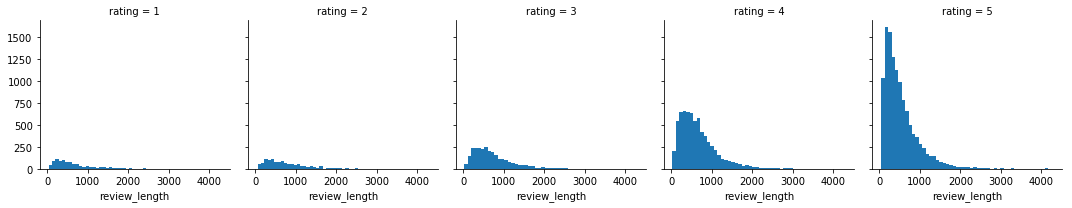

In [24]:
hist = sns.FacetGrid(data=data, col='rating')
hist.map(plt.hist, 'review_length', bins=50)

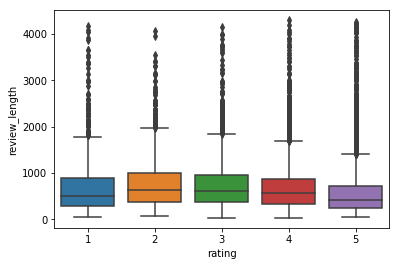

In [25]:
sns.boxplot(x='rating', y='review_length', data=data)

In [26]:
import nltk


In [27]:
nltk.download('wordnet')
wn=nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
import string
 # Imports the library
nltk.download('stopwords') #Download the stopwords dataset
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
def text_process_lemmatize(revw):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. create a list of the cleaned text
    4. Return Lemmatize version of the list
    """
    
    # Replace the xa0 with a space
    revw=revw.replace('xa0',' ')
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in revw if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    token_text= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # perform lemmatization of the above list
    cleantext= ' '.join(wn.lemmatize(word) for word in token_text)
        
    return cleantext    

In [30]:
df['LemmText']=df['Review'].apply(text_process_lemmatize)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CountVectorizer NGrams

In [31]:
from sklearn.feature_extraction.text import CountVectorizer



In [32]:
ngram_vect = CountVectorizer(ngram_range=(1,1))
X_counts = ngram_vect.fit_transform(df['LemmText'])

In [33]:
X_counts_df=pd.DataFrame(X_counts.toarray())

In [34]:
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,29537,29538,29539,29540,29541,29542,29543,29544,29545,29546
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X=X_counts_df
y=df['rating']

TRAIN TEST SPLIT MODELS

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [38]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [39]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
NBpredictions = nb.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

In [42]:
print('Confusion Matrix: \n ', confusion_matrix(y_test,NBpredictions))
print('\n')
print('Classification Report: \n ',classification_report(y_test,NBpredictions))

Confusion Matrix: 
  [[ 191   98]
 [  27 3536]]


Classification Report: 
               precision    recall  f1-score   support

          1       0.88      0.66      0.75       289
          5       0.97      0.99      0.98      3563

avg / total       0.97      0.97      0.97      3852

